Image Path: dataset/images\JPCLN001.png
Mask Path: dataset/masks\JPCLN001.png


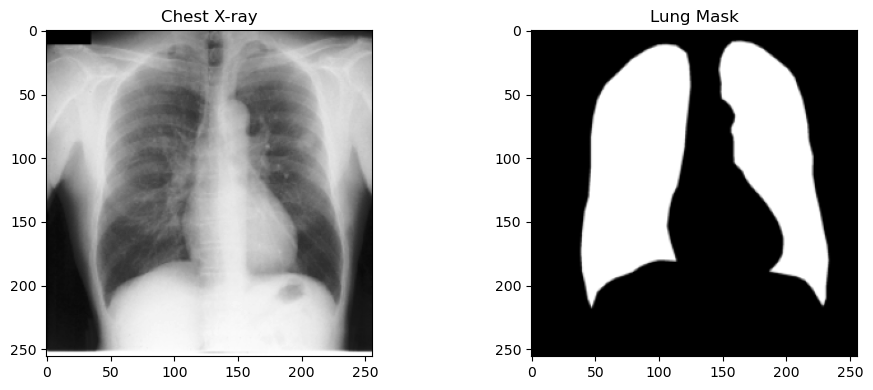

In [6]:
import cv2
import matplotlib.pyplot as plt
import os

# Paths (relative to notebook)
image_dir = "dataset/images"
mask_dir = "dataset/masks"

# Load the first file name (e.g., 'JPCLN001.png')
filename = os.listdir(image_dir)[0]
image_path = os.path.join(image_dir, filename)
mask_path = os.path.join(mask_dir, filename)  # same name

# Debug check
print("Image Path:", image_path)
print("Mask Path:", mask_path)

# Load grayscale
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

# Check if both loaded correctly
if image is None or mask is None:
    print("❌ Failed to load one of the files.")
else:
    # Resize both to 256×256
    image = cv2.resize(image, (256, 256))
    mask = cv2.resize(mask, (256, 256))

    # Show side by side
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title("Chest X-ray")

    plt.subplot(1, 2, 2)
    plt.imshow(mask, cmap='gray')
    plt.title("Lung Mask")
    plt.tight_layout()
    plt.show()


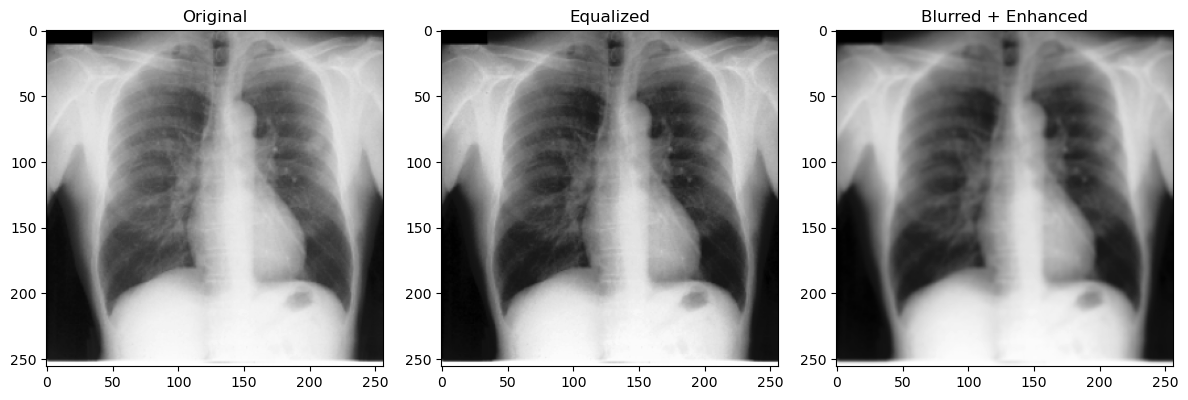

In [7]:
import cv2
import os
import matplotlib.pyplot as plt

# Load same grayscale image again
image_path = "dataset/images/" + filename  # from earlier step
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Resize to 256x256
image = cv2.resize(image, (256, 256))

# Apply Histogram Equalization
equalized = cv2.equalizeHist(image)

# Apply Gaussian Blur
blurred = cv2.GaussianBlur(equalized, (5, 5), 0)

# Save to preprocessed/ folder
save_path = f"preprocessed/{filename}"
cv2.imwrite(save_path, blurred)

# Show comparison
plt.figure(figsize=(12,4))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Original")

plt.subplot(1, 3, 2)
plt.imshow(equalized, cmap='gray')
plt.title("Equalized")

plt.subplot(1, 3, 3)
plt.imshow(blurred, cmap='gray')
plt.title("Blurred + Enhanced")

plt.tight_layout()
plt.show()


In [8]:
import os
import cv2

input_dir = "dataset/images"
output_dir = "preprocessed"

# Ensure output folder exists
os.makedirs(output_dir, exist_ok=True)

# Loop through all images
for filename in os.listdir(input_dir):
    if filename.endswith(".png") or filename.endswith(".jpg"):
        path = os.path.join(input_dir, filename)
        image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

        if image is None:
            print(f"⚠️ Skipped (failed to read): {filename}")
            continue

        # Resize
        image = cv2.resize(image, (256, 256))

        # Histogram Equalization
        image = cv2.equalizeHist(image)

        # Gaussian Blur
        image = cv2.GaussianBlur(image, (5, 5), 0)

        # Save to preprocessed folder
        cv2.imwrite(os.path.join(output_dir, filename), image)

print("✅ All images preprocessed and saved!")


✅ All images preprocessed and saved!


In [9]:
import os
import cv2

input_dir = "preprocessed"
output_dir = "outputs/thresholding"
os.makedirs(output_dir, exist_ok=True)

for filename in os.listdir(input_dir):
    if filename.endswith(".png") or filename.endswith(".jpg"):
        img_path = os.path.join(input_dir, filename)
        image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        if image is None:
            print(f"⚠️ Skipped: {filename}")
            continue

        # Binary Threshold
        _, th_binary = cv2.threshold(image, 100, 255, cv2.THRESH_BINARY)

        # Otsu Threshold
        _, th_otsu = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        # Save outputs
        cv2.imwrite(os.path.join(output_dir, filename.replace('.png', '_binary.png')), th_binary)
        cv2.imwrite(os.path.join(output_dir, filename.replace('.png', '_otsu.png')), th_otsu)

print("✅ Thresholding complete for all images!")


✅ Thresholding complete for all images!


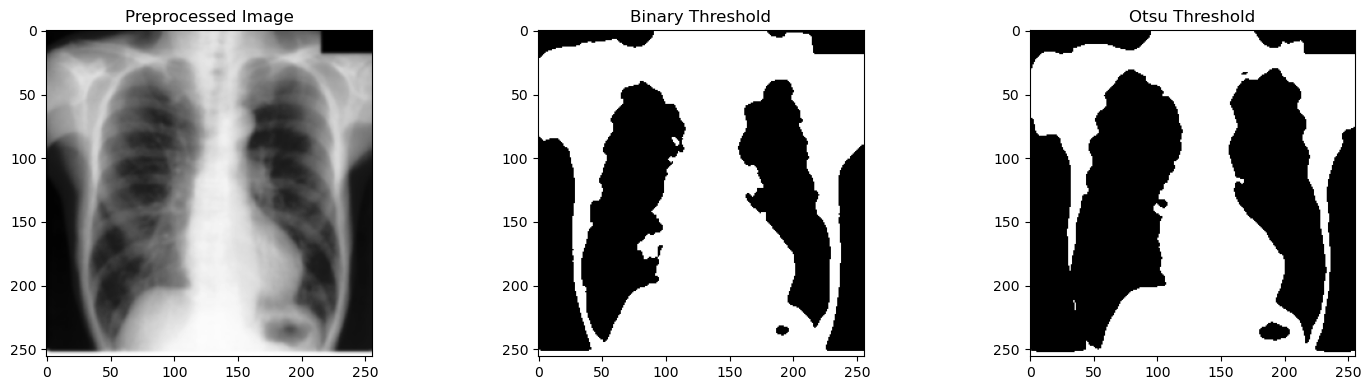

In [14]:
import matplotlib.pyplot as plt
import cv2
import os

# Pick one sample file from preprocessed
sample_filename = "JPCLN093.png"
base_name = os.path.splitext(sample_filename)[0]  # removes '.png'

# Paths
pre_img_path = f"preprocessed/{base_name}.png"
binary_mask_path = f"outputs/thresholding/{base_name}_binary.png"
otsu_mask_path = f"outputs/thresholding/{base_name}_otsu.png"

# Load all 3 images
img = cv2.imread(pre_img_path, cv2.IMREAD_GRAYSCALE)
binary = cv2.imread(binary_mask_path, cv2.IMREAD_GRAYSCALE)
otsu = cv2.imread(otsu_mask_path, cv2.IMREAD_GRAYSCALE)

# Check if any of them failed to load
if img is None:
    print(f"❌ Failed to load preprocessed image: {pre_img_path}")
if binary is None:
    print(f"❌ Failed to load binary mask: {binary_mask_path}")
if otsu is None:
    print(f"❌ Failed to load Otsu mask: {otsu_mask_path}")

# Only plot if all are valid
if img is not None and binary is not None and otsu is not None:
    plt.figure(figsize=(15, 4))
    plt.subplot(1, 3, 1)
    plt.imshow(img, cmap='gray')
    plt.title("Preprocessed Image")

    plt.subplot(1, 3, 2)
    plt.imshow(binary, cmap='gray')
    plt.title("Binary Threshold")

    plt.subplot(1, 3, 3)
    plt.imshow(otsu, cmap='gray')
    plt.title("Otsu Threshold")

    plt.tight_layout()
    plt.show()
else:
    print("⚠️ One or more images failed to load. Check filenames or output folders.")


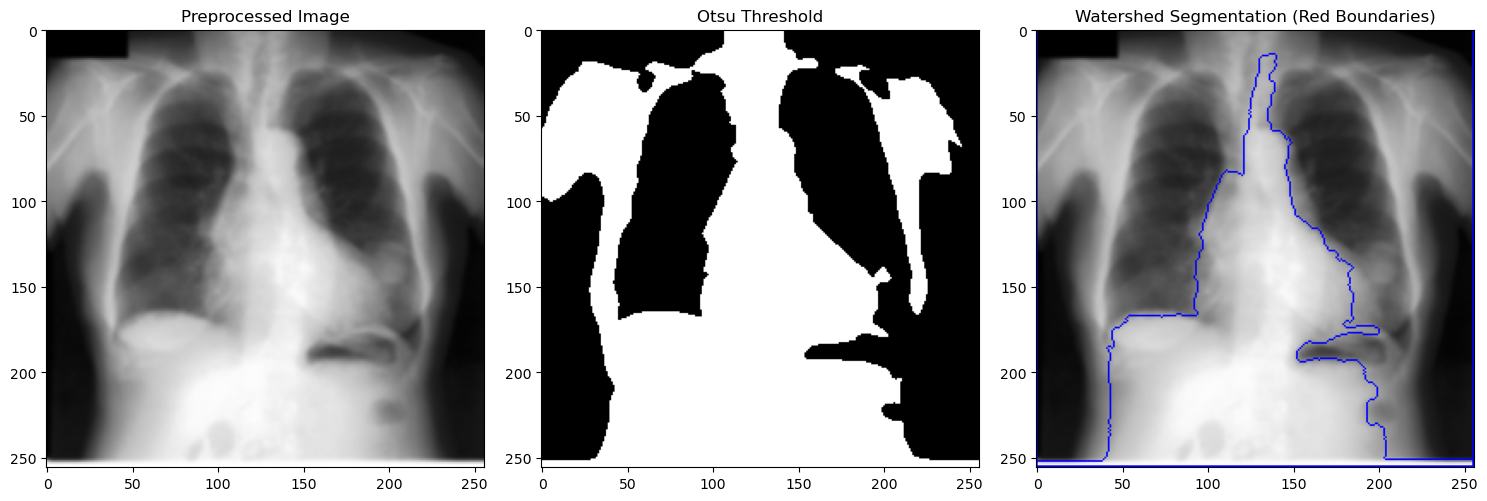

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# ----- Step 1: Safely load a preprocessed image file -----

# Get only .png or .jpg files from preprocessed folder
valid_images = [f for f in os.listdir("preprocessed") if f.endswith((".png", ".jpg"))]

if not valid_images:
    print("❌ No valid image files found in 'preprocessed/'")
    exit()

filename = valid_images[1]  # You can change the index to view different images
img_path = os.path.join("preprocessed", filename)

# Read grayscale image
gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

if gray is None:
    print(f"❌ Failed to load image: {img_path}")
    exit()

# Convert grayscale to BGR (needed for watershed color markers)
image_color = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)

# ----- Step 2: Otsu's threshold -----
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# ----- Step 3: Morphological opening (remove noise) -----
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# ----- Step 4: Sure background area -----
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# ----- Step 5: Sure foreground area (distance transform) -----
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.6 * dist_transform.max(), 255, 0)

# ----- Step 6: Find unknown region -----
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# ----- Step 7: Marker labeling -----
_, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1  # Background becomes 1 instead of 0
markers[unknown == 255] = 0  # Mark unknown region with 0

# ----- Step 8: Apply watershed -----
markers = cv2.watershed(image_color, markers)

# Mark watershed boundaries with red
image_color[markers == -1] = [255, 0, 0]

# ----- Step 9: Visualize the result -----
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(gray, cmap='gray')
plt.title("Preprocessed Image")

plt.subplot(1, 3, 2)
plt.imshow(thresh, cmap='gray')
plt.title("Otsu Threshold")

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB))
plt.title("Watershed Segmentation (Red Boundaries)")

plt.tight_layout()
plt.show()


In [5]:
import tensorflow as tf
import os
import numpy as np
from tensorflow.keras.utils import Sequence
from tensorflow.keras.preprocessing.image import load_img, img_to_array

class LungDataGenerator(Sequence):
    def __init__(self, image_dir, mask_dir, batch_size=8, img_size=(256, 256), shuffle=True):
        self.image_dir = image_dir
        self.mask_dir = mask_dir
        self.batch_size = batch_size
        self.img_size = img_size
        self.shuffle = shuffle
        self.image_filenames = os.listdir(image_dir)
        self.on_epoch_end()

    def __len__(self):
        return int(np.floor(len(self.image_filenames) / self.batch_size))

    def __getitem__(self, index):
        batch_filenames = self.image_filenames[index * self.batch_size:(index + 1) * self.batch_size]
        X = np.zeros((self.batch_size, *self.img_size, 1), dtype=np.float32)
        Y = np.zeros((self.batch_size, *self.img_size, 1), dtype=np.float32)

        for i, filename in enumerate(batch_filenames):
            img_path = os.path.join(self.image_dir, filename)
            mask_path = os.path.join(self.mask_dir, filename)

            # Load, resize, scale
            img = load_img(img_path, color_mode='grayscale', target_size=self.img_size)
            mask = load_img(mask_path, color_mode='grayscale', target_size=self.img_size)

            X[i] = img_to_array(img) / 255.0
            Y[i] = img_to_array(mask) / 255.0

        return X, Y

    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.image_filenames)


In [6]:
train_gen = LungDataGenerator("dataset/images", "dataset/masks", batch_size=4)

# Check one batch
X, Y = train_gen[0]
print("X shape:", X.shape)   # (4, 256, 256, 1)
print("Y shape:", Y.shape)


X shape: (4, 256, 256, 1)
Y shape: (4, 256, 256, 1)


In [7]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.layers import Conv2DTranspose, concatenate

def build_unet(input_shape=(256, 256, 1)):
    inputs = Input(input_shape)

    # -------- Encoder (Downsampling) --------
    c1 = Conv2D(16, (3, 3), activation='relu', padding='same')(inputs)
    c1 = Dropout(0.1)(c1)
    c1 = Conv2D(16, (3, 3), activation='relu', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(32, (3, 3), activation='relu', padding='same')(p1)
    c2 = Dropout(0.1)(c2)
    c2 = Conv2D(32, (3, 3), activation='relu', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)

    c3 = Conv2D(64, (3, 3), activation='relu', padding='same')(p2)
    c3 = Dropout(0.2)(c3)
    c3 = Conv2D(64, (3, 3), activation='relu', padding='same')(c3)
    p3 = MaxPooling2D((2, 2))(c3)

    c4 = Conv2D(128, (3, 3), activation='relu', padding='same')(p3)
    c4 = Dropout(0.2)(c4)
    c4 = Conv2D(128, (3, 3), activation='relu', padding='same')(c4)
    p4 = MaxPooling2D(pool_size=(2, 2))(c4)

    # -------- Bottleneck --------
    c5 = Conv2D(256, (3, 3), activation='relu', padding='same')(p4)
    c5 = Dropout(0.3)(c5)
    c5 = Conv2D(256, (3, 3), activation='relu', padding='same')(c5)

    # -------- Decoder (Upsampling) --------
    u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(128, (3, 3), activation='relu', padding='same')(u6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv2D(128, (3, 3), activation='relu', padding='same')(c6)

    u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(64, (3, 3), activation='relu', padding='same')(u7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv2D(64, (3, 3), activation='relu', padding='same')(c7)

    u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(32, (3, 3), activation='relu', padding='same')(u8)
    c8 = Dropout(0.1)(c8)
    c8 = Conv2D(32, (3, 3), activation='relu', padding='same')(c8)

    u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = concatenate([u9, c1])
    c9 = Conv2D(16, (3, 3), activation='relu', padding='same')(u9)
    c9 = Dropout(0.1)(c9)
    c9 = Conv2D(16, (3, 3), activation='relu', padding='same')(c9)

    # -------- Output --------
    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c9)

    model = Model(inputs=[inputs], outputs=[outputs])
    return model


In [8]:
unet_model = build_unet(input_shape=(256, 256, 1))
unet_model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 256, 256, 1)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d (Conv2D)               │ (None, 256, 256, 16)      │             160 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout (Dropout)             │ (None, 256, 256, 16)      │               0 │ conv2d[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_1 (Conv2D)             │ (None, 256, 256, 16)      │           2,320 │ dropout[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d (MaxPooling2D)  │ (None, 128, 128, 16)      │               0 │ conv2d_1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_2 (Conv2D)             │ (None, 128, 128, 32)      │           4,640 │ max_pooling2d[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_1 (Dropout)           │ (None, 128, 128, 32)      │               0 │ conv2d_2[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_3 (Conv2D)             │ (None, 128, 128, 32)      │           9,248 │ dropout_1[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_1               │ (None, 64, 64, 32)        │               0 │ conv2d_3[0][0]             │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_4 (Conv2D)             │ (None, 64, 64, 64)        │          18,496 │ max_pooling2d_1[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_2 (Dropout)           │ (None, 64, 64, 64)        │               0 │ conv2d_4[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_5 (Conv2D)             │ (None, 64, 64, 64)        │          36,928 │ dropout_2[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_2               │ (None, 32, 32, 64)        │               0 │ conv2d_5[0][0]             │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_6 (Conv2D)             │ (None, 32, 32, 128)       │          73,856 │ max_pooling2d_2[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_3 (Dropout)           │ (None, 32, 32, 128)       │               0 │ conv2d_6[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_7 (Conv2D)             │ (None, 32, 32, 128)       │         147,584 │ dropout_3[0][0]            │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 1,940,817 (7.40 MB)

 Trainable params: 1,940,817 (7.40 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
import tensorflow.keras.backend as K
import tensorflow as tf

def dice_coefficient(y_true, y_pred, smooth=1):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

def dice_loss(y_true, y_pred):
    return 1 - dice_coefficient(y_true, y_pred)


In [10]:
from tensorflow.keras.optimizers import Adam

def combined_loss(y_true, y_pred):
    bce = tf.keras.losses.BinaryCrossentropy()(y_true, y_pred)
    return bce + dice_loss(y_true, y_pred)

unet_model.compile(optimizer=Adam(learning_rate=1e-4),
                   loss=combined_loss,
                   metrics=[dice_coefficient])


In [11]:
# Use your custom generator
train_gen = LungDataGenerator("dataset/images", "dataset/masks", batch_size=8)

# Train the UNet
history = unet_model.fit(
    train_gen,
    epochs=15,
    steps_per_epoch=len(train_gen),
    verbose=1
)


Epoch 1/15


C:\Users\Lenovo\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


30/30 ━━━━━━━━━━━━━━━━━━━━ 23s 569ms/step - dice_coefficient: 0.3782 - loss: 1.3114
Epoch 2/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 18s 589ms/step - dice_coefficient: 0.3635 - loss: 1.2696
Epoch 3/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 645ms/step - dice_coefficient: 0.3946 - loss: 1.1145
Epoch 4/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 660ms/step - dice_coefficient: 0.5104 - loss: 0.8838
Epoch 5/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 667ms/step - dice_coefficient: 0.8158 - loss: 0.4432
Epoch 6/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 663ms/step - dice_coefficient: 0.8671 - loss: 0.3072
Epoch 7/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 666ms/step - dice_coefficient: 0.8815 - loss: 0.2736
Epoch 8/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 668ms/step - dice_coefficient: 0.8925 - loss: 0.2465
Epoch 9/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 667ms/step - dice_coefficient: 0.8920 - loss: 0.2462
Epoch 10/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 660ms/step - dice_coefficient: 0.9070 - loss: 0.2102
Epoch 11/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 666ms/step - dice

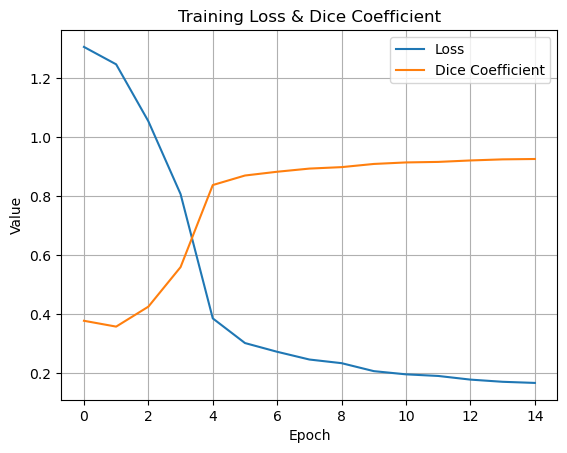

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['dice_coefficient'], label='Dice Coefficient')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.title("Training Loss & Dice Coefficient")
plt.grid(True)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


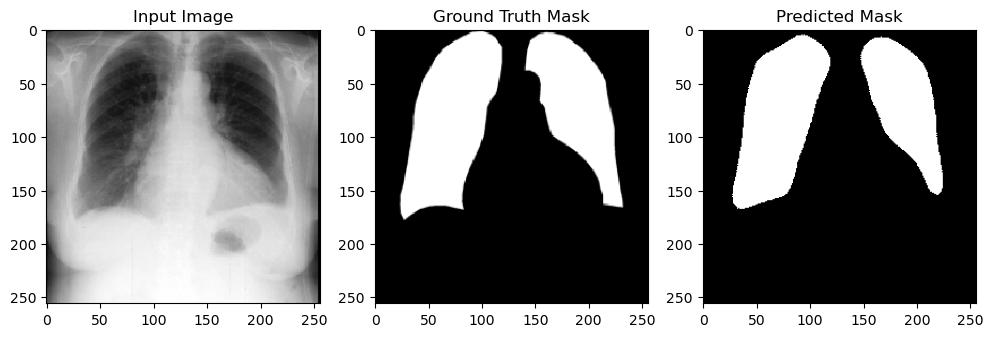

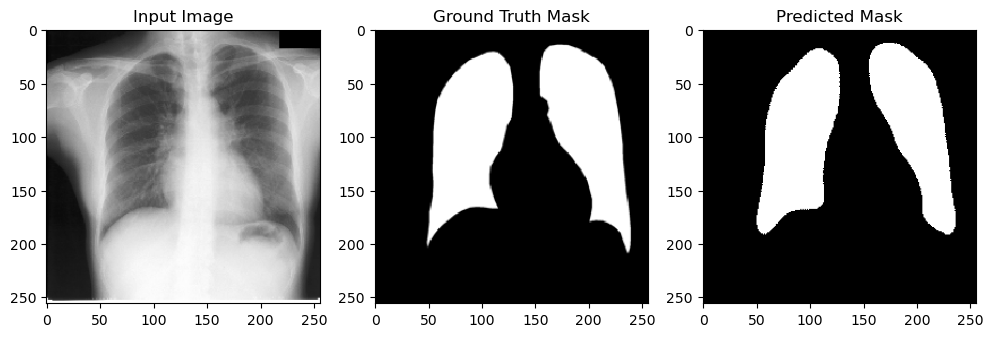

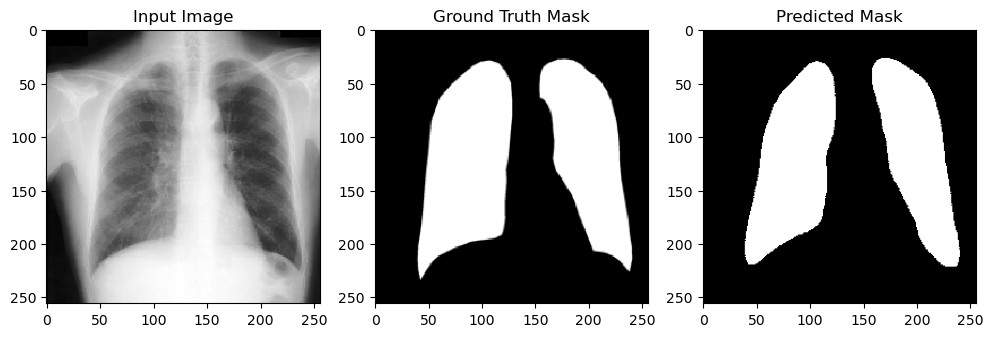

In [13]:
import random
import matplotlib.pyplot as plt

# Load a batch from the generator
X_batch, Y_batch = train_gen[random.randint(0, len(train_gen) - 1)]

# Predict the masks
preds = unet_model.predict(X_batch)

# Threshold predictions to [0 or 1]
preds_thresh = (preds > 0.5).astype(np.uint8)

# Visualize first 3 predictions
for i in range(3):
    plt.figure(figsize=(12,4))
    
    plt.subplot(1,3,1)
    plt.imshow(X_batch[i].squeeze(), cmap='gray')
    plt.title("Input Image")
    
    plt.subplot(1,3,2)
    plt.imshow(Y_batch[i].squeeze(), cmap='gray')
    plt.title("Ground Truth Mask")
    
    plt.subplot(1,3,3)
    plt.imshow(preds_thresh[i].squeeze(), cmap='gray')
    plt.title("Predicted Mask")
    
    plt.show()


In [14]:
unet_model.save("lung_segmentation_unet.h5")
